In [1]:
### Importing all the packages
import requests
import urllib.request
import time
import spacy
from bs4 import BeautifulSoup
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import nltk
import re
import unicodedata
from nltk.corpus import stopwords

In [2]:
## Making our google query ready
topic="AI"
numResults=1000
url ="https://www.google.com/search?q="+topic+"&tbm=nws&hl=en&num="+str(numResults)

In [3]:
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

In [4]:
results = soup.find_all("div", attrs = {"class": "ZINbbc"})

In [5]:
descriptions = []
for result in results:
    try:
        description = result.find("div", attrs={"class":"s3v9rd"}).get_text()
        if description != "": 
            descriptions.append(description)
    except:
        continue

In [6]:
text = "".join(descriptions)

In [7]:
#### Cleaning text 
### reference (https://github.com/kaparker/gameofthrones-wordclouds/blob/master/gotwordcloud.py)

def removetitle(text):
    return re.sub(r'.*:', '', text)

def removebrackets(text):
    return re.sub('[\(\[].*?[\)\]]', ' ', text)

def remove_accented_chars(text):
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

def remove_special_chars(text, remove_digits=False):
    pattern = r'[^a-zA-Z0-9\s]' if not remove_digits else r'[^a-zA-Z\s]'
    return re.sub(pattern, '', text)

def remove_stopwords(text):
    stopword_list = stopwords.words('english')
    tokens = nltk.word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    return ' '.join([token for token in tokens if token not in stopword_list])

def lemmatize(text):
    text = nlp(text)
    return ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])


In [8]:
text_title=removetitle(text)
text_brackets=removebrackets(text_title)
text_clean=remove_accented_chars(text_brackets)
text_clean=text_clean.lower()
text_clean=remove_special_chars(text_clean)
text_clean=remove_stopwords(text_clean)

In [9]:
## To check if your function worked on the text 
text==text_clean

False

In [10]:
## Our resultant text
text_clean

'step human voice taken input converted8 hours ago iit guwahati researchers design aibased system detect colorectal cancer team researchers iit guwahati led professor11 hours ago 2050 number alzheimers patients china estimated reach 45 million lu yuan chinese teenager invented ai wearable19 hours ago grandview apm awardwinning manufacturing ai solution features asset data centric management approach generate1 day ago ai deep manufacturing expertise seebo leverages artificial intelligence identify processdriven inefficiencies production process to3 days ago big technology companies deploy powerful ai systems shape economies societies important mostly invisible ways3 days ago milestones achieved artificial intelligence literally brought world toes like industries ai gamechanger the4 hours ago agxeed faromatics honeyai winners robot event agrobofood event pitch robot find investor smes presented9 hours ago elliptic labs ai virtual proximity sensor inner beauty shipping xiaomis topselling 

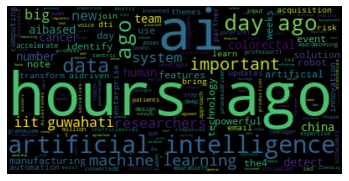

In [11]:
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text_clean)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

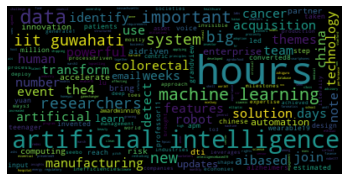

In [12]:
### By adding some more stops words in list 
wordcloud = WordCloud(stopwords=set(list(STOPWORDS)+['day','ai','ago','hour'])).generate(text_clean)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Here we are trying a different method to clean text we are taking only nouns and making text lower 

In [13]:
nltk.download('averaged_perceptron_tagger')
# function to test if something is a noun
is_noun = lambda pos: pos[:2] == 'NN'
# do the nlp stuff
tokenized = nltk.word_tokenize(text)
nouns = [word.lower() for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)] 

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\rinki\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [14]:
text_noun = " ".join(nouns)

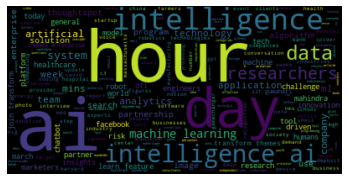

In [15]:
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text_noun)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

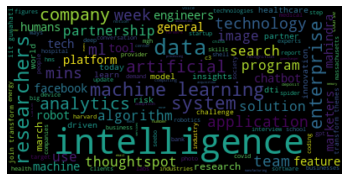

In [16]:
### By adding some more stops words in list
wordcloud = WordCloud(stopwords=set(list(STOPWORDS)+['day','ai','ago','hour','hours','days'])).generate(text_noun)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Visualization of the unigram, bigram, and trigram on the text data

ago 100
ai 89
artificial 55
hours 53
intelligence 53
day 23
driven 13
based 13
data 13
new 12
researchers 10
machine 10
learning 10
days 9
important 7
uses 6
analytics 6
company 6
10 6
technology 5


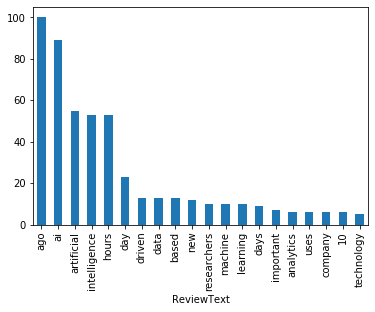

In [17]:
### Visualizing unigrams
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from plotly.offline import iplot
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(descriptions, 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df2.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar')


hours ago 53
artificial intelligence 52
day ago 22
intelligence ai 19
ago artificial 11
ai driven 10
days ago 9
machine learning 9
ago ai 7
driven analytics 6
mins ago 5
hour ago 5
ai data 5
ago new 4
ai machine 4
17 hours 4
14 hours 3
search ai 3
cloud based 3
ai artificial 3


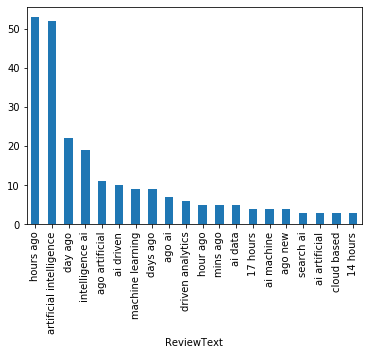

In [18]:
## Visualizing bigrams
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(descriptions, 20)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df4.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar')


artificial intelligence ai 19
ago artificial intelligence 11
ai driven analytics 5
hours ago artificial 4
ai machine learning 4
17 hours ago 4
14 hours ago 3
search ai driven 3
hours ago new 3
day ago artificial 3
hours ago ai 3
10 hours ago 3
ago join transform 3
join transform 2021 3
transform 2021 important 3
2021 important themes 3
important themes enterprise 3
themes enterprise ai 3
enterprise ai data 3
ai data learn 3


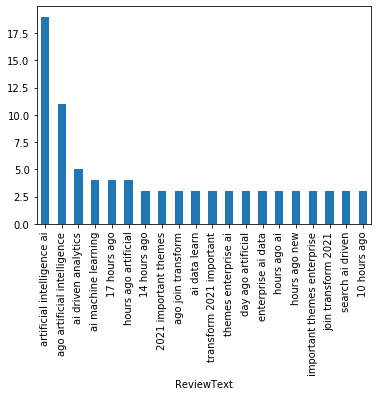

In [19]:
## Visualizing trigrams
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(descriptions, 20)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df4.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar')


## Let us see the most occuring POS tag in our corpus

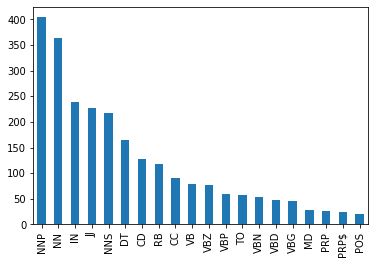

In [20]:
## Let us see which POS is most occuring 
from textblob import TextBlob
blob = TextBlob(str(descriptions))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.plot(
    kind='bar')

### Name entity Recognition

In [21]:
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
## Here we preprocess the word by tokenizing it and then tagging its parts of speech i.e. POS
def preprocess(sent):
    sent = nltk.word_tokenize(sent)
    sent = nltk.pos_tag(sent)
    return sent
sent = preprocess(text_clean)
sent


[('step', 'NN'),
 ('human', 'JJ'),
 ('voice', 'NN'),
 ('taken', 'VBN'),
 ('input', 'NN'),
 ('converted8', 'NN'),
 ('hours', 'NNS'),
 ('ago', 'RB'),
 ('iit', 'VBP'),
 ('guwahati', 'JJ'),
 ('researchers', 'NNS'),
 ('design', 'VBP'),
 ('aibased', 'JJ'),
 ('system', 'NN'),
 ('detect', 'JJ'),
 ('colorectal', 'JJ'),
 ('cancer', 'NN'),
 ('team', 'NN'),
 ('researchers', 'NNS'),
 ('iit', 'VBP'),
 ('guwahati', 'NN'),
 ('led', 'VBD'),
 ('professor11', 'NN'),
 ('hours', 'NNS'),
 ('ago', 'IN'),
 ('2050', 'CD'),
 ('number', 'NN'),
 ('alzheimers', 'NNS'),
 ('patients', 'NNS'),
 ('china', 'VBP'),
 ('estimated', 'VBN'),
 ('reach', 'VBP'),
 ('45', 'CD'),
 ('million', 'CD'),
 ('lu', 'JJ'),
 ('yuan', 'JJ'),
 ('chinese', 'JJ'),
 ('teenager', 'NN'),
 ('invented', 'VBD'),
 ('ai', 'JJ'),
 ('wearable19', 'NN'),
 ('hours', 'NNS'),
 ('ago', 'RB'),
 ('grandview', 'VBP'),
 ('apm', 'JJ'),
 ('awardwinning', 'VBG'),
 ('manufacturing', 'NN'),
 ('ai', 'JJ'),
 ('solution', 'NN'),
 ('features', 'NNS'),
 ('asset', 'NN'),


In [22]:
pattern = 'NP: {<DT>?<JJ>*<NN>}'
cp = nltk.RegexpParser(pattern)
cs = cp.parse(sent)
print(cs)

(S
  (NP step/NN)
  (NP human/JJ voice/NN)
  taken/VBN
  (NP input/NN)
  (NP converted8/NN)
  hours/NNS
  ago/RB
  iit/VBP
  guwahati/JJ
  researchers/NNS
  design/VBP
  (NP aibased/JJ system/NN)
  (NP detect/JJ colorectal/JJ cancer/NN)
  (NP team/NN)
  researchers/NNS
  iit/VBP
  (NP guwahati/NN)
  led/VBD
  (NP professor11/NN)
  hours/NNS
  ago/IN
  2050/CD
  (NP number/NN)
  alzheimers/NNS
  patients/NNS
  china/VBP
  estimated/VBN
  reach/VBP
  45/CD
  million/CD
  (NP lu/JJ yuan/JJ chinese/JJ teenager/NN)
  invented/VBD
  (NP ai/JJ wearable19/NN)
  hours/NNS
  ago/RB
  grandview/VBP
  apm/JJ
  awardwinning/VBG
  (NP manufacturing/NN)
  (NP ai/JJ solution/NN)
  features/NNS
  (NP asset/NN)
  data/NNS
  (NP centric/JJ management/NN)
  (NP approach/NN)
  (NP generate1/NN)
  (NP day/NN)
  ago/IN
  (NP ai/JJ deep/JJ manufacturing/NN)
  (NP expertise/NN)
  (NP seebo/NN)
  leverages/VBZ
  (NP artificial/JJ intelligence/NN)
  identify/VB
  processdriven/JJ
  inefficiencies/NNS
  (NP produ

In [23]:
from nltk.chunk import conlltags2tree, tree2conlltags
from pprint import pprint
iob_tagged = tree2conlltags(cs)
pprint(iob_tagged)

[('step', 'NN', 'B-NP'),
 ('human', 'JJ', 'B-NP'),
 ('voice', 'NN', 'I-NP'),
 ('taken', 'VBN', 'O'),
 ('input', 'NN', 'B-NP'),
 ('converted8', 'NN', 'B-NP'),
 ('hours', 'NNS', 'O'),
 ('ago', 'RB', 'O'),
 ('iit', 'VBP', 'O'),
 ('guwahati', 'JJ', 'O'),
 ('researchers', 'NNS', 'O'),
 ('design', 'VBP', 'O'),
 ('aibased', 'JJ', 'B-NP'),
 ('system', 'NN', 'I-NP'),
 ('detect', 'JJ', 'B-NP'),
 ('colorectal', 'JJ', 'I-NP'),
 ('cancer', 'NN', 'I-NP'),
 ('team', 'NN', 'B-NP'),
 ('researchers', 'NNS', 'O'),
 ('iit', 'VBP', 'O'),
 ('guwahati', 'NN', 'B-NP'),
 ('led', 'VBD', 'O'),
 ('professor11', 'NN', 'B-NP'),
 ('hours', 'NNS', 'O'),
 ('ago', 'IN', 'O'),
 ('2050', 'CD', 'O'),
 ('number', 'NN', 'B-NP'),
 ('alzheimers', 'NNS', 'O'),
 ('patients', 'NNS', 'O'),
 ('china', 'VBP', 'O'),
 ('estimated', 'VBN', 'O'),
 ('reach', 'VBP', 'O'),
 ('45', 'CD', 'O'),
 ('million', 'CD', 'O'),
 ('lu', 'JJ', 'B-NP'),
 ('yuan', 'JJ', 'I-NP'),
 ('chinese', 'JJ', 'I-NP'),
 ('teenager', 'NN', 'I-NP'),
 ('invented', 'VBD

In [24]:
nltk.download('words')
nltk.download('maxent_ne_chunker')
ne_tree = nltk.ne_chunk(pos_tag(word_tokenize(text_clean)))
print(ne_tree)

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\rinki\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\rinki\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


(S
  step/NN
  human/JJ
  voice/NN
  taken/VBN
  input/NN
  converted8/NN
  hours/NNS
  ago/RB
  iit/VBP
  guwahati/JJ
  researchers/NNS
  design/VBP
  aibased/JJ
  system/NN
  detect/JJ
  colorectal/JJ
  cancer/NN
  team/NN
  researchers/NNS
  iit/VBP
  guwahati/NN
  led/VBD
  professor11/NN
  hours/NNS
  ago/IN
  2050/CD
  number/NN
  alzheimers/NNS
  patients/NNS
  china/VBP
  estimated/VBN
  reach/VBP
  45/CD
  million/CD
  lu/JJ
  yuan/JJ
  chinese/JJ
  teenager/NN
  invented/VBD
  ai/JJ
  wearable19/NN
  hours/NNS
  ago/RB
  grandview/VBP
  apm/JJ
  awardwinning/VBG
  manufacturing/NN
  ai/JJ
  solution/NN
  features/NNS
  asset/NN
  data/NNS
  centric/JJ
  management/NN
  approach/NN
  generate1/NN
  day/NN
  ago/IN
  ai/JJ
  deep/JJ
  manufacturing/NN
  expertise/NN
  seebo/NN
  leverages/VBZ
  artificial/JJ
  intelligence/NN
  identify/VB
  processdriven/JJ
  inefficiencies/NNS
  production/NN
  process/NN
  to3/NN
  days/NNS
  ago/RB
  big/JJ
  technology/NN
  companies/NNS
 

What it means ?
* B-NP : beginning of a noun phrase
* I-NP : descibes that the word is inside of the current noun phrase.
* O : end of the sentence.
* B-VP and I-VP : beginning and inside of a verb phrase.

## Sentiment analyisis with Textblob

In [25]:
from textblob import TextBlob

# compute sentiment scores (polarity) and labels
sentiment_scores_tb = [round(TextBlob(article).sentiment.polarity, 3) for article in descriptions]
sentiment_category_tb = ['positive' if score > 0 
                             else 'negative' if score < 0 
                                 else 'neutral' 
                                     for score in sentiment_scores_tb]

In [26]:
sentiment=pd.DataFrame()
sentiment['article']=descriptions
sentiment['sentiments']=sentiment_category_tb

In [27]:
sentiment.head().T

,0,1,2,3,4
article,4 hours ago · Applicable to all key personnel/...,"1 day ago · Coding, robotics and Artificial In...",3 days ago · Deep Nostalgia is an AI tool from...,14 hours ago · With the rising insurgence of A...,1 day ago · AnalytixLabs offers an Applied AI ...
sentiments,neutral,negative,positive,negative,positive
